In [470]:
import pandas as pd 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as MSE
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [405]:
df=pd.read_excel("Stats SAU HMN 2015_2019.xlsx", header=1)

In [487]:
df.shape

(255283, 12)

In [407]:
df["AGE"]=df["AGE"]/365
df["DUREE_SEJOUR"]=df["DUREE_SEJOUR"]/60

In [408]:
df=df.drop("MOY_ARR", axis=1)

In [409]:
df["SEXE"].replace({"M": 0, "F": 1}, inplace=True)
df.head()

,SEXE,AGE,CODE_POSTAL,DATE_ENTREE,HEURE_ENTREE,DATE_SORTIE,HEURE_SORTIE,NIV_GRAV,CCMU,DIAG_PRINC,SORTIE,DUREE_SEJOUR,DECISION_SAU
0,0,47.547945,94210,15/07/2015,15:12:00,15/07/2015,18:03:00,4.0,2,M23.3,SORTIE,2.850000,1
1,0,51.301370,94430,15/07/2015,15:09:00,15/07/2015,22:58:00,4.0,2,F29,940000615,7.816667,5
2,1,68.717808,94370,15/07/2015,13:34:00,16/07/2015,14:59:00,3.0,2,A08.4,SORTIE,25.416667,2
3,1,39.353425,94600,15/07/2015,14:22:00,15/07/2015,19:56:00,4.0,2,K29.7,SORTIE,5.566667,1
4,0,39.800000,94410,15/07/2015,15:49:00,15/07/2015,19:55:00,3.0,2,T59.9,SORTIE,4.100000,1


In [410]:
indexNames = df[ df["SORTIE"] == "SANSSOINS" ].index
df.drop(indexNames , inplace=True)
df=df.drop("SORTIE", axis=1)

In [411]:
df.head(32)

,SEXE,AGE,CODE_POSTAL,DATE_ENTREE,HEURE_ENTREE,DATE_SORTIE,HEURE_SORTIE,NIV_GRAV,CCMU,DIAG_PRINC,DUREE_SEJOUR,DECISION_SAU
0,0,47.547945,94210,15/07/2015,15:12:00,15/07/2015,18:03:00,4.0,2,M23.3,2.850000,1
1,0,51.301370,94430,15/07/2015,15:09:00,15/07/2015,22:58:00,4.0,2,F29,7.816667,5
2,1,68.717808,94370,15/07/2015,13:34:00,16/07/2015,14:59:00,3.0,2,A08.4,25.416667,2
3,1,39.353425,94600,15/07/2015,14:22:00,15/07/2015,19:56:00,4.0,2,K29.7,5.566667,1
4,0,39.800000,94410,15/07/2015,15:49:00,15/07/2015,19:55:00,3.0,2,T59.9,4.100000,1
5,1,64.580822,94400,15/07/2015,14:29:00,15/07/2015,19:27:00,4.0,2,K29.7,4.966667,6
6,1,84.115068,94700,15/07/2015,15:13:00,15/07/2015,17:22:00,3.0,2,R53.+1,2.150000,6
7,0,44.572603,94600,15/07/2015,10:55:00,16/07/2015,19:44:00,3.0,2,R50.9,32.816667,2
8,1,69.435616,94700,15/07/2015,14:35:00,15/07/2015,16:31:00,4.0,2,I70.2,1.933333,1
9,1,66.230137,91330,15/07/2015,09:37:00,15/07/2015,16:32:00,4.0,2,S52.50,6.916667,1


In [412]:
df['DATE_ENTREE'] = pd.to_datetime(df['DATE_ENTREE'], infer_datetime_format=True)
df['DATE_SORTIE'] = pd.to_datetime(df['DATE_SORTIE'], infer_datetime_format=True)

In [413]:
df.head()

,SEXE,AGE,CODE_POSTAL,DATE_ENTREE,HEURE_ENTREE,DATE_SORTIE,HEURE_SORTIE,NIV_GRAV,CCMU,DIAG_PRINC,DUREE_SEJOUR,DECISION_SAU
0,0,47.547945,94210,2015-07-15,15:12:00,2015-07-15,18:03:00,4.0,2,M23.3,2.850000,1
1,0,51.301370,94430,2015-07-15,15:09:00,2015-07-15,22:58:00,4.0,2,F29,7.816667,5
2,1,68.717808,94370,2015-07-15,13:34:00,2015-07-16,14:59:00,3.0,2,A08.4,25.416667,2
3,1,39.353425,94600,2015-07-15,14:22:00,2015-07-15,19:56:00,4.0,2,K29.7,5.566667,1
4,0,39.800000,94410,2015-07-15,15:49:00,2015-07-15,19:55:00,3.0,2,T59.9,4.100000,1


In [414]:
df["DIAG_PRINC"].replace({"D50.0": "1","D57.0": "1","D61.9": "1","D62": "1","D64.9": "1","D68.9": "1","D69.0": "1","D69.2": "1","D69.6": "1", "E83.5": "2", "E86": "2", "E87.0": "2", "E87.1": "2", "E87.5": "2", "E87.6": "2", "I20.0": "3", "I20.8": "3","I20.9": "3","I21.9": "3","I26.9": "3","I30.1": "3","I44.2": "3","I45.9": "3","I46.9": "3","I47.1": "3","I47.2": "3","I48": "3","I49.1": "3","I49.9": "3","I50.0": "3","I50.1": "3","I50.9": "3","I60.8": "3","I62.9": "3","I63.9": "3","I64": "3","I70.2": "3","I71.0": "3","I71.9": "3","I74.3": "3","I80.9": "3","I83.0": "3","I83.9": "3","I84.9": "3","I85.0": "3","I88.0": "3","I89.0": "3","I89.1": "3","I95.1": "3","J0": "4","J11.1": "4","J12.9": "4","J15.9": "4","J18.9": "4","J20.9": "4","J21.9": "4","J30.4": "4","J32.9": "4","J36": "4","J38.5": "4","J39.0": "4","J45.9": "4","J46": "4","J68.9": "4","J69.0": "4","J84.9": "4","J90": "4","J93.9": "4","J96.0": "4","96.1": "4","R00.0": "5","R00.1": "5","R04.2": "5","R06.0": "5","R07.1": "5","R5": "5","T17.2": "6","T17.3": "6","T17.4": "6","T17.5": "6","T17.8": "6","T17.9": "6"}, inplace=True)

In [415]:
df.head(50)

,SEXE,AGE,CODE_POSTAL,DATE_ENTREE,HEURE_ENTREE,DATE_SORTIE,HEURE_SORTIE,NIV_GRAV,CCMU,DIAG_PRINC,DUREE_SEJOUR,DECISION_SAU
0,0,47.547945,94210,2015-07-15,15:12:00,2015-07-15,18:03:00,4.0,2,M23.3,2.850000,1
1,0,51.301370,94430,2015-07-15,15:09:00,2015-07-15,22:58:00,4.0,2,F29,7.816667,5
2,1,68.717808,94370,2015-07-15,13:34:00,2015-07-16,14:59:00,3.0,2,A08.4,25.416667,2
3,1,39.353425,94600,2015-07-15,14:22:00,2015-07-15,19:56:00,4.0,2,K29.7,5.566667,1
4,0,39.800000,94410,2015-07-15,15:49:00,2015-07-15,19:55:00,3.0,2,T59.9,4.100000,1
5,1,64.580822,94400,2015-07-15,14:29:00,2015-07-15,19:27:00,4.0,2,K29.7,4.966667,6
6,1,84.115068,94700,2015-07-15,15:13:00,2015-07-15,17:22:00,3.0,2,R53.+1,2.150000,6
7,0,44.572603,94600,2015-07-15,10:55:00,2015-07-16,19:44:00,3.0,2,R50.9,32.816667,2
8,1,69.435616,94700,2015-07-15,14:35:00,2015-07-15,16:31:00,4.0,2,3,1.933333,1
9,1,66.230137,91330,2015-07-15,09:37:00,2015-07-15,16:32:00,4.0,2,S52.50,6.916667,1


In [416]:
# indexNames = df[ (df["DIAG_PRINC"] = 1) | (df["DIAG_PRINC"] == 2) | (df["DIAG_PRINC"] == 3) | (df["DIAG_PRINC"] == 4) | (df["DIAG_PRINC"] != 5) | (df["DIAG_PRINC"] != 6)].index
df2= df[(df["DIAG_PRINC"]=="1") | (df["DIAG_PRINC"]=="2") | (df["DIAG_PRINC"]=="3") | (df["DIAG_PRINC"]=="4") | (df["DIAG_PRINC"]=="5") | (df["DIAG_PRINC"]=="6") ]

In [417]:
df2.shape

(34241, 12)

In [418]:
df2=df2.assign(Nb_patients=1)
df2

,SEXE,AGE,CODE_POSTAL,DATE_ENTREE,HEURE_ENTREE,DATE_SORTIE,HEURE_SORTIE,NIV_GRAV,CCMU,DIAG_PRINC,DUREE_SEJOUR,DECISION_SAU,Nb_patients
8,1,69.435616,94700,2015-07-15,14:35:00,2015-07-15,16:31:00,4.0,2,3,1.933333,1,1
21,0,73.545205,93330,2015-07-15,12:23:00,2015-07-16,13:51:00,3.0,2,5,25.466667,2,1
23,1,38.169863,69480,2015-07-15,13:24:00,2015-07-15,15:17:00,2.0,2,1,1.883333,6,1
24,1,86.441096,94000,2015-07-15,10:49:00,2015-07-15,16:51:00,1.0,2,3,6.033333,6,1
42,0,28.463014,75005,2015-07-15,18:10:00,2015-07-16,13:27:00,2.0,2,1,19.283333,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266340,0,76.857534,94600,2019-12-31,18:32:00,2019-12-31,21:04:00,4.0,2,5,2.533333,1,1
266341,0,44.054795,94700,2019-12-31,18:42:00,2019-12-31,21:06:00,1.0,3,4,2.400000,5,1
266352,0,35.136986,91120,2019-12-31,20:53:00,2020-01-01,02:04:00,2.0,2,1,5.183333,1,1
266369,0,43.767123,94190,2019-12-31,19:07:00,2020-01-01,00:29:00,3.0,2,4,5.366667,1,1


In [419]:
df3 = df2.set_index('DATE_ENTREE').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
df3["Nb_patients"] = df2[['DATE_ENTREE', 'Nb_patients']].groupby(['DATE_ENTREE']).sum()
df3=df3.reset_index()
df3.to_csv("Nbpatients.csv")
df3

,DATE_ENTREE,AGE,NIV_GRAV,DUREE_SEJOUR,Nb_patients
0,2015-01-01,54.128596,2.625000,6.868750,16
1,2015-01-02,44.444879,2.666667,11.676984,21
2,2015-01-03,46.301494,3.380952,8.826515,22
3,2015-01-04,58.431703,2.761905,10.519841,21
4,2015-01-05,57.463242,2.500000,7.659722,12
...,...,...,...,...,...
1821,2019-12-27,61.109198,2.518519,10.032143,28
1822,2019-12-28,50.796944,2.730769,12.728205,26
1823,2019-12-29,59.133924,2.705882,11.148039,17
1824,2019-12-30,70.009915,2.550000,9.707937,21


In [486]:
age=DF["AGE"].mean()
nbp=DF["Nb_patients"].mean()
sej=DF["DUREE_SEJOUR"].mean()
grav=DF["NIV_GRAV"].mean()
print("Age moyen : {}".format(age))
print("Nombre de patients moyens : {}".format(nbp))
print("Durée de séjour moyenne : {}".format(sej))
print("Niveau de gravité moyen : {}".format(grav))

Age moyen : 57.88511513896609
Nombre de patients moyens : 18.751916757940855
Durée de séjour moyenne : 10.759696386263384
Niveau de gravité moyen : 2.6047355926738844


In [420]:
df4=pd.read_csv("info_meteo.csv", header=0)
df4

,Unnamed: 0,temperature,pluie,vent,humidite,pression,preprocess_date
0,0,0.600000,0.000000,8.041667,83.708333,1036.870833,2015-01-01
1,1,4.079167,0.008333,11.333333,88.875000,1034.420833,2015-01-02
2,2,7.333333,0.166667,17.416667,93.041667,1027.237500,2015-01-03
3,3,3.970833,0.008333,7.958333,83.458333,1035.795833,2015-01-04
4,4,-0.412500,0.000000,4.500000,95.375000,1033.166667,2015-01-05
...,...,...,...,...,...,...,...
1821,1821,9.462500,0.200000,15.500000,84.458333,1028.125000,2019-12-27
1822,1822,6.658333,0.000000,9.125000,81.708333,1037.504167,2019-12-28
1823,1823,2.087500,0.000000,5.791667,85.625000,1036.408333,2019-12-29
1824,1824,1.908333,0.000000,3.625000,85.375000,1033.337500,2019-12-30


In [425]:
DF=pd.merge(df3,df4, how='inner', left_index=True, right_index=True)
DF=DF.drop("Unnamed: 0", axis=1)
DF=DF.drop("preprocess_date", axis=1)
DF["temperature j-1"]=1
DF["temperature j-2"]=1
DF["pluie j-1"]=0
DF["pluie j-2"]=0    
DF["humidite j-1"]=85
DF["humidite j-2"]=85
DF["pression j-1"]=1030
DF["pression j-2"]=1030
DF["vent j-1"]=1
DF["vent j-2"]=1
DF

,DATE_ENTREE,AGE,NIV_GRAV,DUREE_SEJOUR,Nb_patients,temperature,pluie,vent,humidite,pression,temperature j-1,temperature j-2,pluie j-1,pluie j-2,humidite j-1,humidite j-2,pression j-1,pression j-2,vent j-1,vent j-2
0,2015-01-01,54.128596,2.625000,6.868750,16,0.600000,0.000000,8.041667,83.708333,1036.870833,1,1,0,0,85,85,1030,1030,1,1
1,2015-01-02,44.444879,2.666667,11.676984,21,4.079167,0.008333,11.333333,88.875000,1034.420833,1,1,0,0,85,85,1030,1030,1,1
2,2015-01-03,46.301494,3.380952,8.826515,22,7.333333,0.166667,17.416667,93.041667,1027.237500,1,1,0,0,85,85,1030,1030,1,1
3,2015-01-04,58.431703,2.761905,10.519841,21,3.970833,0.008333,7.958333,83.458333,1035.795833,1,1,0,0,85,85,1030,1030,1,1
4,2015-01-05,57.463242,2.500000,7.659722,12,-0.412500,0.000000,4.500000,95.375000,1033.166667,1,1,0,0,85,85,1030,1030,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,61.109198,2.518519,10.032143,28,9.462500,0.200000,15.500000,84.458333,1028.125000,1,1,0,0,85,85,1030,1030,1,1
1822,2019-12-28,50.796944,2.730769,12.728205,26,6.658333,0.000000,9.125000,81.708333,1037.504167,1,1,0,0,85,85,1030,1030,1,1
1823,2019-12-29,59.133924,2.705882,11.148039,17,2.087500,0.000000,5.791667,85.625000,1036.408333,1,1,0,0,85,85,1030,1030,1,1
1824,2019-12-30,70.009915,2.550000,9.707937,21,1.908333,0.000000,3.625000,85.375000,1033.337500,1,1,0,0,85,85,1030,1030,1,1


In [426]:
values = {'temperature': 15, 'pluie': 0, 'humidite': 85, 'pression': 1030, 'vent':1}
DF=DF.fillna(value=values)

In [427]:
for i in range(2,1827):
    DF["temperature j-1"][i]=DF["temperature"][i-1]
    DF["temperature j-2"][i]=DF["temperature"][i-2]
    DF["pluie j-1"][i]=DF["pluie"][i-1]
    DF["pluie j-2"][i]=DF["temperature"][i-2]      
    DF["humidite j-1"][i]=DF["humidite"][i-1]
    DF["humidite j-2"][i]=DF["humidite"][i-2]
    DF["pression j-1"][i]=DF["pression"][i-1]
    DF["pression j-2"][i]=DF["pression"][i-2]
    DF["vent j-1"][i]=DF["vent"][i-1]
    DF["vent j-2"][i]=DF["temperature"][i-2]       
DF

<ipython-input-427-db2dbd17deae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["temperature j-1"][i]=DF["temperature"][i-1]
<ipython-input-427-db2dbd17deae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["temperature j-2"][i]=DF["temperature"][i-2]
<ipython-input-427-db2dbd17deae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["pluie j-1"][i]=DF["pluie"][i-1]
<ipython-input-427-db2dbd17deae>:5: SettingWithCopyWarning: 


,DATE_ENTREE,AGE,NIV_GRAV,DUREE_SEJOUR,Nb_patients,temperature,pluie,vent,humidite,pression,temperature j-1,temperature j-2,pluie j-1,pluie j-2,humidite j-1,humidite j-2,pression j-1,pression j-2,vent j-1,vent j-2
0,2015-01-01,54.128596,2.625000,6.868750,16,0.600000,0.000000,8.041667,83.708333,1036.870833,1,1,0,0,85,85,1030,1030,1,1
1,2015-01-02,44.444879,2.666667,11.676984,21,4.079167,0.008333,11.333333,88.875000,1034.420833,1,1,0,0,85,85,1030,1030,1,1
2,2015-01-03,46.301494,3.380952,8.826515,22,7.333333,0.166667,17.416667,93.041667,1027.237500,4,0,0,0,88,83,1034,1036,11,0
3,2015-01-04,58.431703,2.761905,10.519841,21,3.970833,0.008333,7.958333,83.458333,1035.795833,7,4,0,4,93,88,1027,1034,17,4
4,2015-01-05,57.463242,2.500000,7.659722,12,-0.412500,0.000000,4.500000,95.375000,1033.166667,3,7,0,7,83,93,1035,1027,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,61.109198,2.518519,10.032143,28,9.462500,0.200000,15.500000,84.458333,1028.125000,6,8,0,8,87,75,1023,1024,11,8
1822,2019-12-28,50.796944,2.730769,12.728205,26,6.658333,0.000000,9.125000,81.708333,1037.504167,9,6,0,6,84,87,1028,1023,15,6
1823,2019-12-29,59.133924,2.705882,11.148039,17,2.087500,0.000000,5.791667,85.625000,1036.408333,6,9,0,9,81,84,1037,1028,9,9
1824,2019-12-30,70.009915,2.550000,9.707937,21,1.908333,0.000000,3.625000,85.375000,1033.337500,2,6,0,6,85,81,1036,1037,5,6


In [430]:
X= DF[['temperature', 'pluie', 'humidite', 'pression', 'vent',
       'temperature j-1', 'temperature j-2', 'pluie j-1', 'pluie j-2',
       'humidite j-1', 'humidite j-2', 'pression j-1', 'pression j-2',
       'vent j-1', 'vent j-2']]
y= DF["Nb_patients"]
y1= DF["AGE"]
y2= DF["NIV_GRAV"]
y3= DF["DUREE_SEJOUR"]

In [431]:
DF.isnull().sum().sum()

0

In [432]:
DF["DUREE_SEJOUR"].idxmin()
DF["DUREE_SEJOUR"][1413]=1
DF["DUREE_SEJOUR"][637]=1

<ipython-input-432-0659b0bd329c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["DUREE_SEJOUR"][1413]=1
<ipython-input-432-0659b0bd329c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF["DUREE_SEJOUR"][637]=1


In [433]:
DF["DUREE_SEJOUR"].mean()

10.759696386263384

In [480]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)
model = linear_model.LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Compute test-set MSE
mse_patients = MSE(y_test, y_pred)
# Compute test-set RMSE 
rmse_patients = mse_patients**(1/2)
# Print rmse_dt 
print("RMSE pour le nombre de Patients avec LinearRegression : {}".format(rmse_patients))

RMSE pour le nombre de Patients avec LinearRegression : 5.716329201159168


In [481]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.33, random_state=69)
model1 = linear_model.LinearRegression()
model1.fit(X_train1,y_train1)
y_pred1=model1.predict(X_test1)
# Compute test-set MSE
mse_age = MSE(y_test1, y_pred1)
# Compute test-set RMSE 
rmse_age = mse_age**(1/2)
# Print rmse_dt 
print("RMSE pour l'âge avec LinearRegression : {}".format(rmse_age))

RMSE pour l'âge avec LinearRegression : 5.997026187897228


In [484]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.33, random_state=42)
model2 = linear_model.LinearRegression()
model2.fit(X_train2,y_train2)
y_pred2=model2.predict(X_test2)
# Compute test-set MSE
mse_grav = MSE(y_test2, y_pred2)
# Compute test-set RMSE 
rmse_grav = mse_grav**(1/2)
# Print rmse_dt 
print("RMSE pour le niveau de gravité avec LinearRegression : {}".format(rmse_grav))

RMSE pour le niveau de gravité avec LinearRegression : 0.22746015560815394


In [437]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.33, random_state=69)
model3 = linear_model.LinearRegression()
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
# Compute test-set MSE
mse_sejour = MSE(y_test3, y_pred3)
# Compute test-set RMSE 
rmse_sejour = mse_sejour**(1/2)
# Print rmse_dt 
print(rmse_sejour)

8.562455704336475


In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)
model = linear_model.Lasso(tol=2)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Compute test-set MSE
mse_patients = MSE(y_test, y_pred)
# Compute test-set RMSE 
rmse_patients = mse_patients**(1/2)
# Print rmse_dt 
print("RMSE pour le nombre de Patients avec Lasso : {}".format(rmse_patients))

RMSE pour le nombre de Patients avec Lasso : 5.708038732369833


In [479]:
X_train, X_test, y_train, y_testc = train_test_split(X, y, test_size=0.33, random_state=69)
model = linear_model.ElasticNet(l1_ratio=0.8,tol=2)
model.fit(X_train,y_train)
y_predc=model.predict(X_test)
# Compute test-set MSE
mse_patients = MSE(y_testc, y_predc)
# Compute test-set RMSE 
rmse_patients = mse_patients**(1/2)
# Print rmse_dt 
print("RMSE pour le nombre de Patients avec ElasticNet : {}".format(rmse_patients))

RMSE pour le nombre de Patients avec ElasticNet : 5.7076844069810715


In [440]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)
model = linear_model.ARDRegression(lambda_1=0.5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Compute test-set MSE
mse_patients = MSE(y_test, y_pred)
# Compute test-set RMSE 
rmse_patients = mse_patients**(1/2)
# Print rmse_dt 
print(rmse_patients)

5.730370523575879


In [485]:
X_train, X_test, y_train, y_test3= train_test_split(X, y3, test_size=0.33, random_state=69)
model = linear_model.ARDRegression(lambda_1=0.5)
model.fit(X_train,y_train)
y_pred3=model.predict(X_test)
# Compute test-set MSE
mse_patients = MSE(y_test3, y_pred3)
# Compute test-set RMSE 
rmse_patients = mse_patients**(1/2)
# Print rmse_dt 
print("RMSE de la durée du sejour avec ARDRegression : {}".format(rmse_patients))

RMSE de la durée du sejour avec ARDRegression : 2.902727582130519


In [464]:
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
GBoost.fit(X_train,y_train)
acc_GBoost = round(GBoost.score(X_train, y_train) * 100, 2)

GBoost_rmse = sqrt(mean_squared_error(y_test,GBoost.predict(X_test)))
print(acc_GBoost,GBoost_rmse)

89.13 6.319525989163361


<AxesSubplot:xlabel='Nb_patients'>

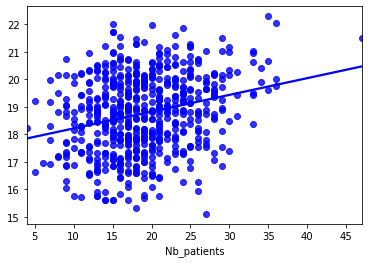

In [448]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="b")

<AxesSubplot:xlabel='AGE'>

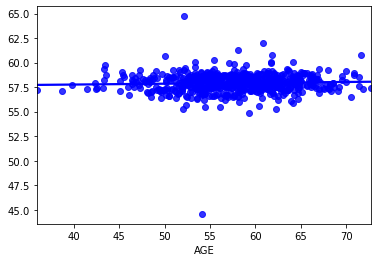

In [450]:
sns.regplot(x=y_test1, y=y_pred1, ci=None, color="b")

<AxesSubplot:xlabel='NIV_GRAV'>

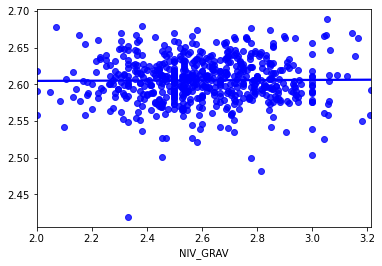

In [444]:
sns.regplot(x=y_test2, y=y_pred2, ci=None, color="b")

<AxesSubplot:xlabel='DUREE_SEJOUR'>

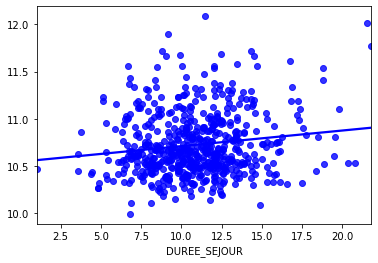

In [445]:
sns.regplot(x=y_test3, y=y_pred3, ci=None, color="b")

In [446]:
plt.scatter(DF["temperature"], y_train, color = "red")
plt.plot(DF["temperature"], model.predict(DF["temperature"]), color = "green")
plt.title("Nombre de patients en fonction des données météos")
plt.xlabel("Données météos")
plt.ylabel("Nombre de Patients")
plt.show()

ValueError: x and y must be the same size

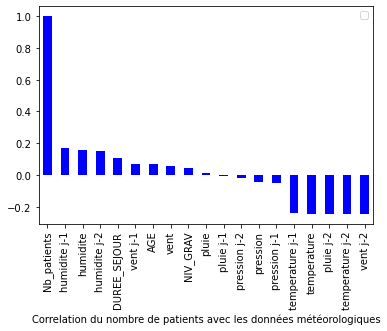

In [452]:
corr = DF.corr()
corr_Nb_patients = corr.Nb_patients.sort_values(ascending=False)
corr_Nb_patients.plot(kind='bar', color='blue')
plt.xlabel('Correlation du nombre de patients avec les données météorologiques')
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend([])
plt.show()

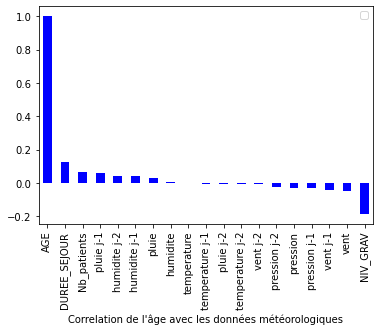

In [453]:
corr = DF.corr()
corr_AGE = corr.AGE.sort_values(ascending=False)
corr_AGE.plot(kind='bar', color='blue')
plt.xlabel("Correlation de l'âge avec les données météorologiques")
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend([])
plt.show()

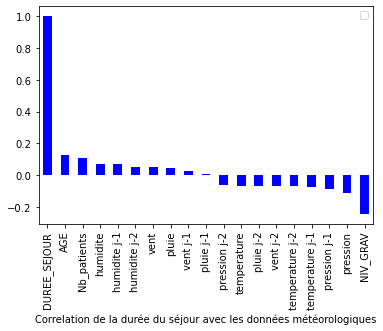

In [454]:
corr = DF.corr()
corr_DUREE_SEJOUR = corr.DUREE_SEJOUR.sort_values(ascending=False)
corr_DUREE_SEJOUR.plot(kind='bar', color='blue')
plt.xlabel("Correlation de la durée du séjour avec les données météorologiques")
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend([])
plt.show()

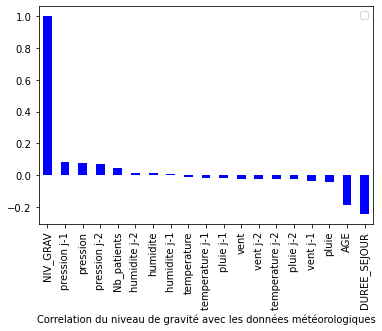

In [455]:
corr = DF.corr()
corr_NIV_GRAV = corr.NIV_GRAV.sort_values(ascending=False)
corr_NIV_GRAV.plot(kind='bar', color='blue')
plt.xlabel('Correlation du niveau de gravité avec les données météorologiques')
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend([])
plt.show()

In [467]:
#create residual vs. predictor plot for 'assists'

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Nb_patients', fig=fig)

AttributeError: 'LinearRegression' object has no attribute 'model'

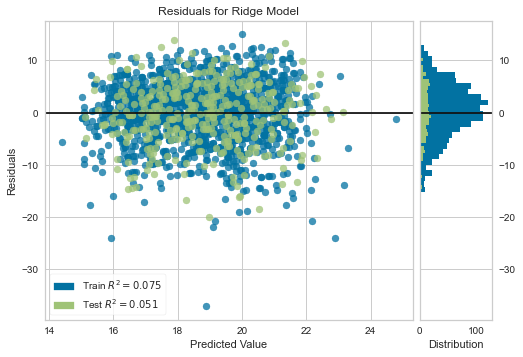

<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [475]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

# Load a regression dataset


# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   